# 0. Simulate phone dataset
## A

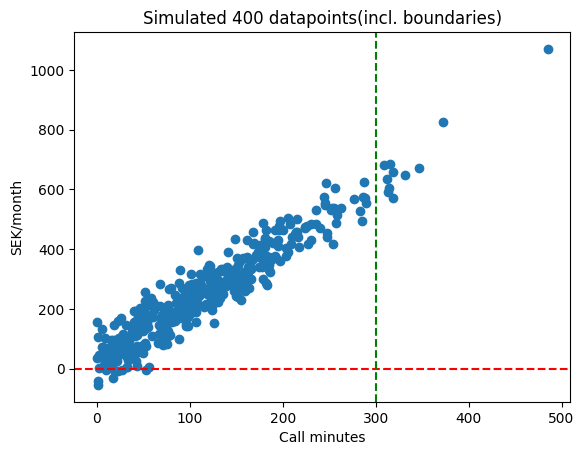

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = np.random.normal(100, 100, size=400) # normalfördelning

x = np.abs(x) # tar bort negativa nummer (absolutvärde)

epsilon = np.random.normal(0, 50, size=400)

y = 2*x + 25 + epsilon

plt.scatter(x, y)
plt.title("Simulated 400 datapoints(incl. boundaries)")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.axhline(y=0, color="red", linestyle="--")
plt.axvline(x=300, color="green", linestyle="--")

# B

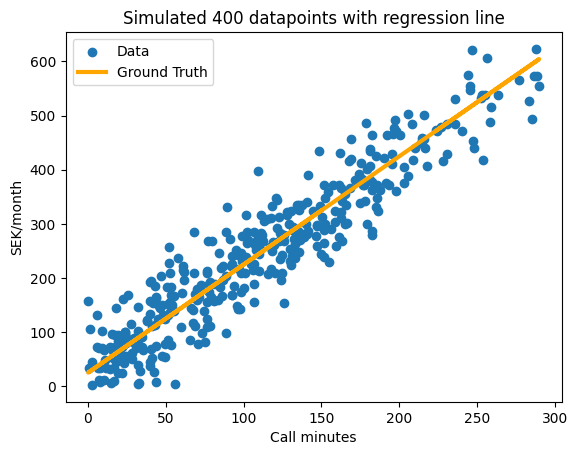

In [63]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.normal(100, 100, size=400) # normalfördelning

x = np.abs(x) # tar bort negativa nummer (absolutvärde)

epsilon = np.random.normal(0, 50, size=400)

y = 2*x + 25 + epsilon

# Tar bort punkter över 300, och under 0
mask = (x < 300) & (y > 0)
x = x[mask]
y = y[mask]


plt.scatter(x, y)
plt.plot(x, 25 + 2 * x, color='orange', linewidth=3) # regressionslinje med sanna parametrar
plt.gca().legend(("Data", "Ground Truth")) # legend uppe i vänstra hörnet
plt.title("Simulated 400 datapoints with regression line")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.show()


In [3]:
df = pd.DataFrame({'x': x, 'y': y})
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,381.0,110.608181,70.695220,0.252936,49.652435,106.428002,161.167629,289.679298
y,381.0,246.203236,143.270223,2.706290,137.119904,241.306311,335.261498,623.193172


# 1. Train | test split

In [17]:
# Försimplad version genom att använda sklearn, kan göra det manuellt via sättet som görs i L0-linear_regression-code-along
from sklearn.model_selection import train_test_split

df_x = df["x"]
df_y = df["y"]


def train_split(x, y):
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=.7, random_state=42)

    return f"X_train: {X_train.shape} X_test: {X_test.shape}, y_train: {y_train.shape} y_test{y_test.shape}"

train_split(df_x, df_y)

'X_train: (114,) X_test: (267,), y_train: (114,) y_test(267,)'

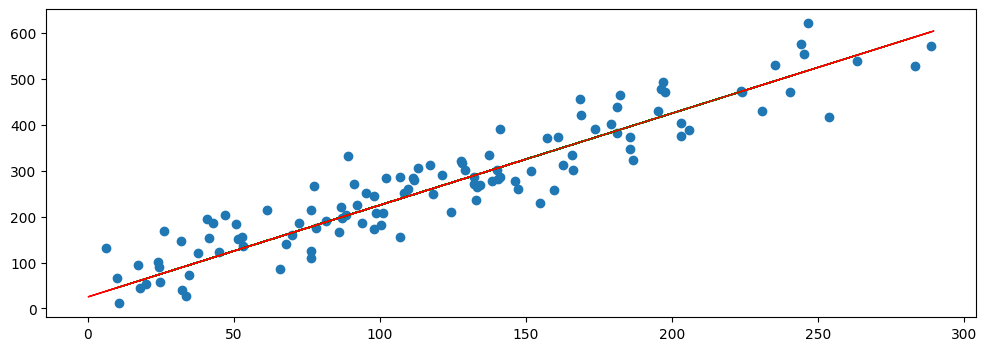

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.7, random_state=42)

plt.figure(figsize=(12,4))
plt.scatter(X_train, y_train)
plt.plot(X_train, 25 + 2 * X_train, color='green', linewidth=1)
plt.plot(x, 25 + 2 * x, color="red", linewidth=1)


In [76]:
X_train

array([263.24113039,  98.1486864 ,  41.53707421,  34.83996524,
       124.36872115,  51.46364522, 127.66907993, 100.51134566,
        86.72651926,  81.43410233, 205.71222262,  98.65027753,
       106.9802085 ,  37.7669368 ,  98.09837921, 137.56980183,
       154.70973812,  33.82135352, 244.12732891, 141.27809269,
       141.29314543, 230.71427543,  10.6334974 , 181.35172174,
       106.85629748,  53.05256141, 181.25258224,  72.49178325,
       165.65536086, 173.846658  ,  88.54601547,  86.98569456,
       168.62601904,  50.69990653, 185.76596232,  20.02964071,
       195.40017635,  76.31813933,  40.84286112,  89.12398515,
        94.04746439,  10.15853287, 140.17117221, 102.10038416,
       111.35173453,   6.21749601, 196.33761292,  69.88963044,
        61.27158712, 117.31809259, 159.51570254, 113.07405773,
       140.40508568, 161.16762888,  86.17356988,  76.30401554,
        78.03281122, 157.08905107, 182.25449121, 101.0233061 ,
       196.86449905,  32.30779997, 146.21034743,  26.08